<a href="https://colab.research.google.com/github/Jassibro/EDA-PROJECT/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
rossman_store=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rossmann Stores Data.csv")
store=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store.csv')

<ipython-input-3-4b13163d7ade>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman_store=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rossmann Stores Data.csv")


### Dataset First View

In [4]:
# Dataset First Look
rossman_store.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [5]:
rossman_store.sample(10)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
905367    773          4  2013-04-11   6332        921     1      1   
149740    331          4  2015-03-19   5918        772     1      1   
675406    502          7  2013-11-03      0          0     0      0   
8827     1023          5  2015-07-24   4534        485     1      0   
761915     41          6  2013-08-17   5003        399     1      0   
388727   1047          2  2014-07-22   4015        465     1      0   
833441    207          5  2013-06-14   9602       1231     1      0   
597124    270          7  2014-01-12      0          0     0      0   
883360   1066          3  2013-05-01      0          0     0      1   
132766     82          5  2015-04-03      0          0     0      1   

       StateHoliday  SchoolHoliday  
905367            0              0  
149740            0              0  
675406            0              0  
8827              0              1  
761915            0              0  
388727            0              1  
833441            0              0  
597124            0              0  
883360            a              0  
132766            b              1

In [6]:
# Dataset First Look
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [7]:
store.sample(10)

Store StoreType Assortment  CompetitionDistance  \
1015   1016         c          c                550.0   
318     319         a          c                570.0   
419     420         d          c                250.0   
520     521         d          a              18610.0   
646     647         a          c               7420.0   
72       73         a          c               1650.0   
346     347         d          c               9360.0   
514     515         d          c              11260.0   
650     651         a          a                200.0   
533     534         d          a               1200.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1015                        NaN                       NaN       1   
318                         9.0                    2012.0       1   
419                         NaN                       NaN       1   
520                        11.0                    2002.0       1   
646                         4.0                    2013.0       0   
72                          9.0                    2008.0       0   
346                         7.0                    2013.0       1   
514                         NaN                       NaN       1   
650                         NaN                       NaN       0   
533                         9.0                    2009.0       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
1015             35.0           2010.0  Mar,Jun,Sept,Dec  
318              27.0           2012.0  Mar,Jun,Sept,Dec  
419              27.0           2012.0   Jan,Apr,Jul,Oct  
520              48.0           2011.0  Mar,Jun,Sept,Dec  
646               NaN              NaN               NaN  
72                NaN              NaN               NaN  
346              22.0           2012.0  Mar,Jun,Sept,Dec  
514               9.0           2011.0   Feb,May,Aug,Nov  
650               NaN              NaN               NaN  
533              45.0           2009.0   Jan,Apr,Jul,Oct

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
rows_and_columns=rossman_store.shape
print(f"There are {rows_and_columns[0]} Rows and {rows_and_columns[1]} Columns, in rossman_store dataset.")

There are 1017209 Rows and 9 Columns, in rossman_store dataset.


In [9]:
rows_and_columns_in_store=store.shape
print(f"There are {rows_and_columns_in_store[0]} Rows and {rows_and_columns_in_store[1]} Columns in Store dataset.")

There are 1115 Rows and 10 Columns in Store dataset.


### Dataset Information

In [10]:
# Dataset Info
rossman_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [11]:
# Dataset Info
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
rossman_store[rossman_store.duplicated()].count()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [13]:
store[store.duplicated()].count()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
na_value_r=rossman_store.isna().sum()
na_value_r

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
na_value_s=store.isna().sum()
na_value_s

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

<Figure size 800x600 with 0 Axes>

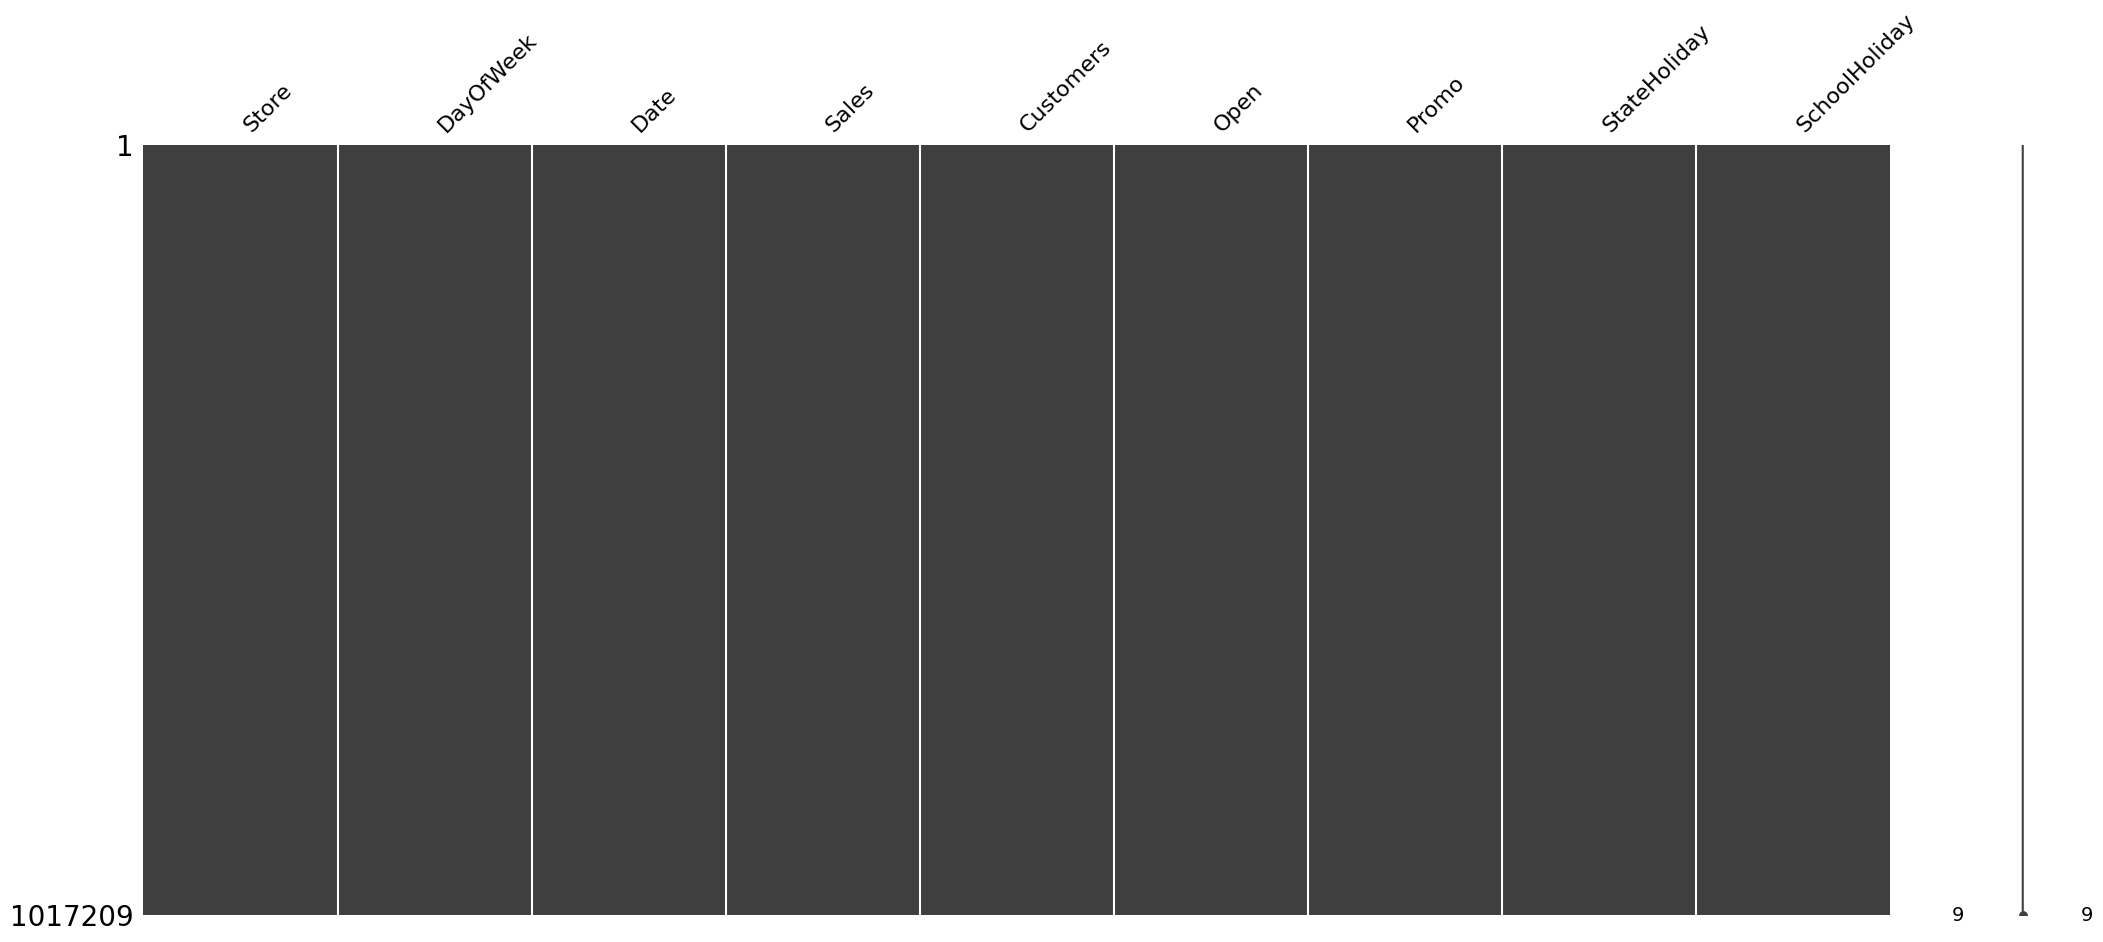

In [16]:
# Visualizing the missing values of rossman_store dataset
plt.figure(figsize=(8,6))
msno.matrix(rossman_store)

<Axes: >

<Figure size 800x600 with 0 Axes>

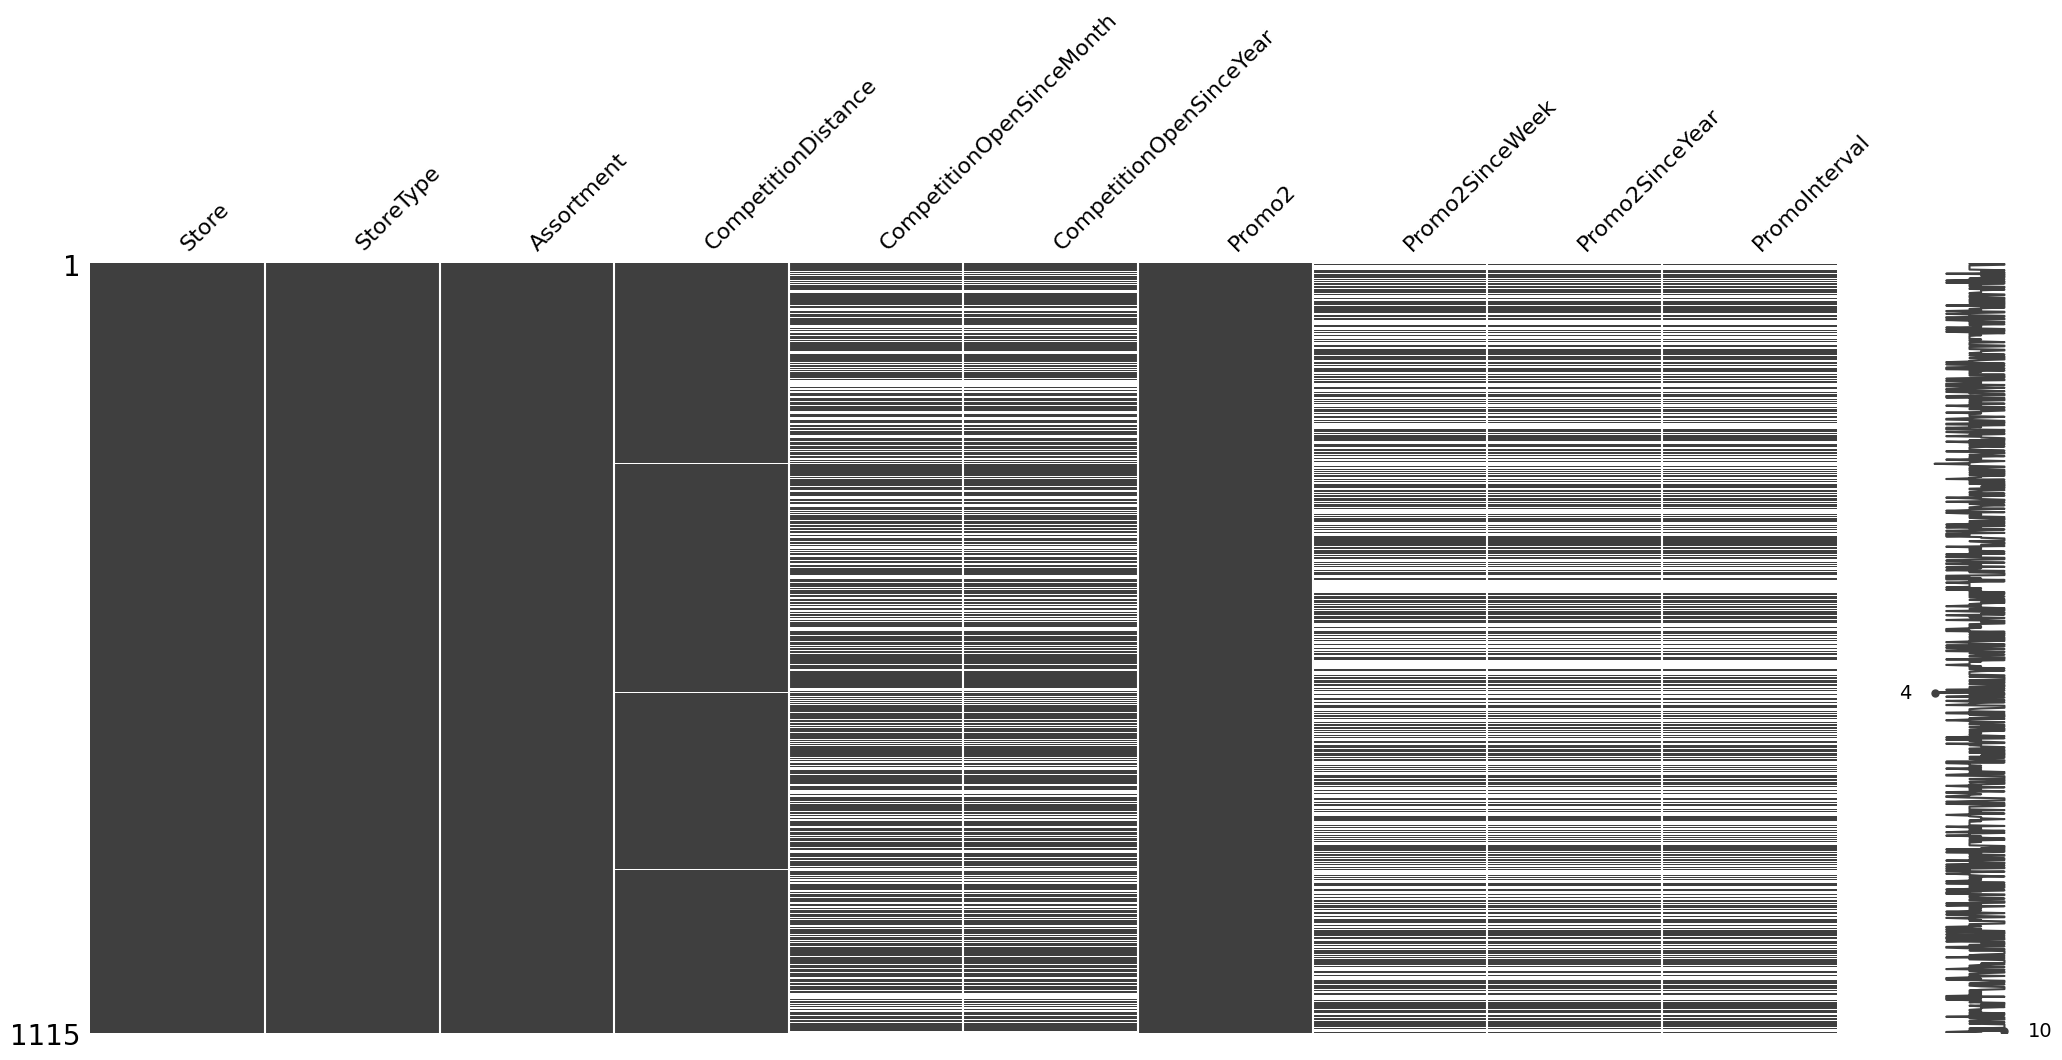

In [17]:
# Visualizing the missing values of store dataset
plt.figure(figsize=(8,6))
msno.matrix(store)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
rossman_store.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [19]:
store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [20]:
# Dataset Describe
rossman_store.describe(include='all')

Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2015-07-31           NaN           NaN   
freq             NaN           NaN        1115           NaN           NaN   
mean    5.584297e+02  3.998341e+00         NaN  5.773819e+03  6.331459e+02   
std     3.219087e+02  1.997391e+00         NaN  3.849926e+03  4.644117e+02   
min     1.000000e+00  1.000000e+00         NaN  0.000000e+00  0.000000e+00   
25%     2.800000e+02  2.000000e+00         NaN  3.727000e+03  4.050000e+02   
50%     5.580000e+02  4.000000e+00         NaN  5.744000e+03  6.090000e+02   
75%     8.380000e+02  6.000000e+00         NaN  7.856000e+03  8.370000e+02   
max     1.115000e+03  7.000000e+00         NaN  4.155100e+04  7.388000e+03   

                Open         Promo StateHoliday  SchoolHoliday  
count   1.017209e+06  1.017209e+06      1017209   1.017209e+06  
unique           NaN           NaN            5            NaN  
top              NaN           NaN            0            NaN  
freq             NaN           NaN       855087            NaN  
mean    8.301067e-01  3.815145e-01          NaN   1.786467e-01  
std     3.755392e-01  4.857586e-01          NaN   3.830564e-01  
min     0.000000e+00  0.000000e+00          NaN   0.000000e+00  
25%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
50%     1.000000e+00  0.000000e+00          NaN   0.000000e+00  
75%     1.000000e+00  1.000000e+00          NaN   0.000000e+00  
max     1.000000e+00  1.000000e+00          NaN   1.000000e+00

In [21]:
# Dataset Describe
store.describe(include='all')

Store StoreType Assortment  CompetitionDistance  \
count   1115.00000      1115       1115          1112.000000   
unique         NaN         4          3                  NaN   
top            NaN         a          a                  NaN   
freq           NaN       602        593                  NaN   
mean     558.00000       NaN        NaN          5404.901079   
std      322.01708       NaN        NaN          7663.174720   
min        1.00000       NaN        NaN            20.000000   
25%      279.50000       NaN        NaN           717.500000   
50%      558.00000       NaN        NaN          2325.000000   
75%      836.50000       NaN        NaN          6882.500000   
max     1115.00000       NaN        NaN         75860.000000   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear       Promo2  \
count                  761.000000                761.000000  1115.000000   
unique                        NaN                       NaN          NaN   
top                           NaN                       NaN          NaN   
freq                          NaN                       NaN          NaN   
mean                     7.224704               2008.668857     0.512108   
std                      3.212348                  6.195983     0.500078   
min                      1.000000               1900.000000     0.000000   
25%                      4.000000               2006.000000     0.000000   
50%                      8.000000               2010.000000     1.000000   
75%                     10.000000               2013.000000     1.000000   
max                     12.000000               2015.000000     1.000000   

        Promo2SinceWeek  Promo2SinceYear    PromoInterval  
count        571.000000       571.000000              571  
unique              NaN              NaN                3  
top                 NaN              NaN  Jan,Apr,Jul,Oct  
freq                NaN              NaN              335  
mean          23.595447      2011.763573              NaN  
std           14.141984         1.674935              NaN  
min            1.000000      2009.000000              NaN  
25%           13.000000      2011.000000              NaN  
50%           22.000000      2012.000000              NaN  
75%           37.000000      2013.000000              NaN  
max           50.000000      2015.000000              NaN

### Variables Description 

**Store:** A unique identifier for each store.

**DayOfWeek:** The day of the week (1-7, where 1 represents Monday and 7 represents Sunday).

**Date:** The date of the sales data.

**Sales:** The amount of sales on a particular day for a specific store.

**Customers:** The number of customers on a particular day for a specific store.

**Open:** A binary variable indicating whether the store was open (1) or closed (0) on a particular day.

**Promo:** A binary variable indicating whether a promotion was active (1) or not (0) on a particular day.

**StateHoliday:** A categorical variable indicating if the day was a state holiday (a, b, c) or not (0).

**SchoolHoliday:** A binary variable indicating if it was a school holiday (1) or not (0).

**StoreType:** The type of store (categorical variable).

**Assortment:** The assortment level of the store (categorical variable).

**CompetitionDistance:** The distance to the nearest competitor store.

**CompetitionOpenSinceMonth:** The month when the nearest competitor store opened.

**CompetitionOpenSinceYear:** The year when the nearest competitor store opened.

**Promo2:** A binary variable indicating whether the store is participating in a continuing promotion (1) or not (0).

**Promo2SinceWeek:** The calendar week when the store started participating in Promo2.

**Promo2SinceYear:** The year when the store started participating in Promo2.

**PromoInterval:** The intervals at which Promo2 is started, indicating the consecutive months the promotion is active.

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable of rossman_store dataset.
for var in rossman_store.columns:
  unique_count=rossman_store[var].nunique()
  print(f'{var}',unique_count)
  if unique_count<=5:
    print(f'uniques values in {var} are',rossman_store[var].unique())



Store 1115
DayOfWeek 7
Date 942
Sales 21734
Customers 4086
Open 2
uniques values in Open are [1 0]
Promo 2
uniques values in Promo are [1 0]
StateHoliday 5
uniques values in StateHoliday are ['0' 'a' 'b' 'c' 0]
SchoolHoliday 2
uniques values in SchoolHoliday are [1 0]


In [23]:
# Check Unique Values for each variable of store dataset.
for va in store.columns:
  unique_count=store[va].nunique()
  print(f'{va}',unique_count)
  if unique_count<=5:
    print(f'unique values in {va} are',store[va].unique())

Store 1115
StoreType 4
unique values in StoreType are ['c' 'a' 'd' 'b']
Assortment 3
unique values in Assortment are ['a' 'c' 'b']
CompetitionDistance 654
CompetitionOpenSinceMonth 12
CompetitionOpenSinceYear 23
Promo2 2
unique values in Promo2 are [0 1]
Promo2SinceWeek 24
Promo2SinceYear 7
PromoInterval 3
unique values in PromoInterval are [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [24]:
# Filling null values in store dataset with mean,median or 0.
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(),inplace=True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mean(),inplace=True)
store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mean(),inplace=True)

In [25]:
store['Promo2SinceWeek'].fillna(0,inplace=True)
store['Promo2SinceYear'].fillna(0,inplace=True)
store['PromoInterval'].fillna(0,inplace=True)

In [26]:
rossman_store['StateHoliday']=rossman_store['StateHoliday'].replace(0,'0')
rossman_store['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [27]:
# Merging both the Dataset.
final=pd.merge(rossman_store,store,on='Store',how='left')

In [28]:
final.sample(10)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
332899    261          5  2014-09-19  14448       1113     1      1   
531462    393          3  2014-03-12   4348        463     1      0   
794257     48          5  2013-07-19   3895        475     1      1   
639619    395          4  2013-12-05   5438        642     1      1   
628304    230          7  2013-12-15      0          0     0      0   
136917    888          2  2015-03-31  12493        930     1      1   
345233    467          6  2014-09-06  13111       1665     1      0   
489971    157          5  2014-04-18      0          0     0      1   
243137    259          3  2014-12-24   9246       1402     1      0   
355167     50          2  2014-08-26   2620        244     1      0   

       StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
332899            0              0         d          c              15340.0   
531462            0              0         d          c               4820.0   
794257            0              1         a          a               1060.0   
639619            0              0         a          a               3620.0   
628304            0              0         d          c               6680.0   
136917            0              0         d          a               4450.0   
345233            0              0         a          c              20390.0   
489971            b              1         a          c               2950.0   
243137            0              1         b          b                210.0   
355167            0              1         d          a               6260.0   

        CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
332899                   4.000000               2015.000000       1   
531462                   3.000000               2008.000000       0   
794257                   5.000000               2012.000000       0   
639619                   2.000000               2013.000000       0   
628304                   9.000000               2013.000000       0   
136917                   6.000000               2012.000000       1   
345233                   4.000000               2008.000000       0   
489971                  10.000000               2004.000000       0   
243137                   7.224704               2008.668857       0   
355167                  11.000000               2009.000000       0   

        Promo2SinceWeek  Promo2SinceYear     PromoInterval  
332899             39.0           2009.0   Jan,Apr,Jul,Oct  
531462              0.0              0.0                 0  
794257              0.0              0.0                 0  
639619              0.0              0.0                 0  
628304              0.0              0.0                 0  
136917             35.0           2012.0  Mar,Jun,Sept,Dec  
345233              0.0              0.0                 0  
489971              0.0              0.0                 0  
243137              0.0              0.0                 0  
355167              0.0              0.0                 0

In [29]:
final.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  CompetitionDistance  \
count  1.017209e+06   1.017209e+06         1.017209e+06   
mean   3.815145e-01   1.786467e-01         5.422021e+03   
std    4.857586e-01   3.830564e-01         7.706918e+03   
min    0.000000e+00   0.000000e+00         2.000000e+01   
25%    0.000000e+00   0.000000e+00         7.100000e+02   
50%    0.000000e+00   0.000000e+00         2.325000e+03   
75%    1.000000e+00   0.000000e+00         6.880000e+03   
max    1.000000e+00   1.000000e+00         7.586000e+04   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear        Promo2  \
count               1.017209e+06              1.017209e+06  1.017209e+06   
mean                7.223450e+00              2.008683e+03  5.005638e-01   
std                 2.652674e+00              4.949376e+00  4.999999e-01   
min                 1.000000e+00              1.900000e+03  0.000000e+00   
25%                 6.000000e+00              2.008000e+03  0.000000e+00   
50%                 7.224704e+00              2.008669e+03  1.000000e+00   
75%                 9.000000e+00              2.011000e+03  1.000000e+00   
max                 1.200000e+01              2.015000e+03  1.000000e+00   

       Promo2SinceWeek  Promo2SinceYear  
count     1.017209e+06     1.017209e+06  
mean      1.164767e+01     1.007011e+03  
std       1.532393e+01     1.005877e+03  
min       0.000000e+00     0.000000e+00  
25%       0.000000e+00     0.000000e+00  
50%       1.000000e+00     2.009000e+03  
75%       2.200000e+01     2.012000e+03  
max       5.000000e+01     2.015000e+03

In [30]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [31]:
final['Date']=pd.to_datetime(final['Date'],format='%Y-%m-%d')

In [32]:
final['CompetitionDistance']=final['CompetitionDistance'].astype(int)

In [33]:
final['CompetitionOpenSinceMonth']=final['CompetitionOpenSinceMonth'].astype(int)

In [34]:
final['CompetitionOpenSinceYear']=final['CompetitionOpenSinceYear'].astype(int)

In [35]:
final['Promo2SinceYear']=final['Promo2SinceWeek'].astype(int)
final['Promo2SinceWeek']=final['Promo2SinceWeek'].astype(int)

In [36]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [37]:
df=final.copy()

In [38]:
dependent_var=df['Sales']

In [39]:
num_var=df.describe().drop('Sales',axis=1).columns
num_var

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

In [40]:
cat_var=df.describe(include=['object']).columns
cat_var

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
#Q1.How does the sales vary across different days of the week? Are there any specific days that consistently exhibit higher or lower sales?



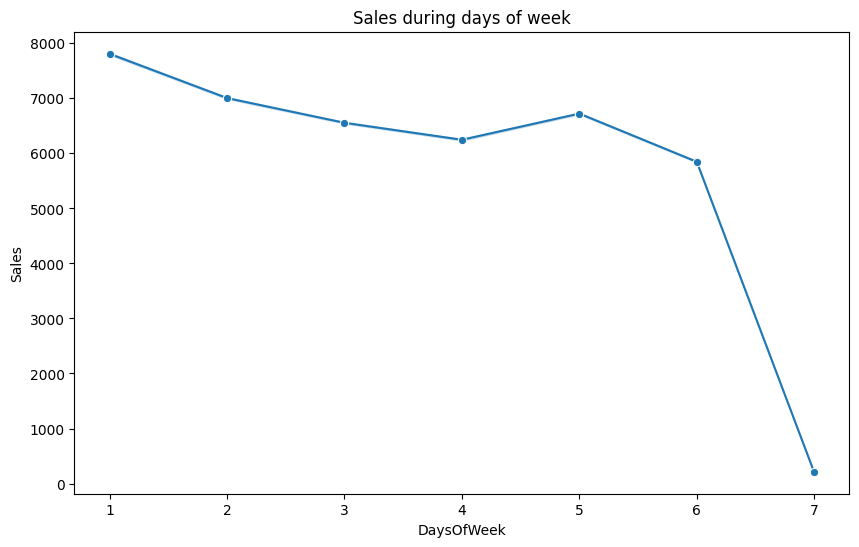

In [41]:
# Chart - 1 visualization code
fig=plt.figure(figsize=(10,6))
sns.lineplot(x='DayOfWeek',y='Sales',data=df,marker='o')
plt.xlabel('DaysOfWeek')
plt.ylabel('Sales')
plt.title('Sales during days of week');
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2
#Q2-How does the sales vary across different storetypes?

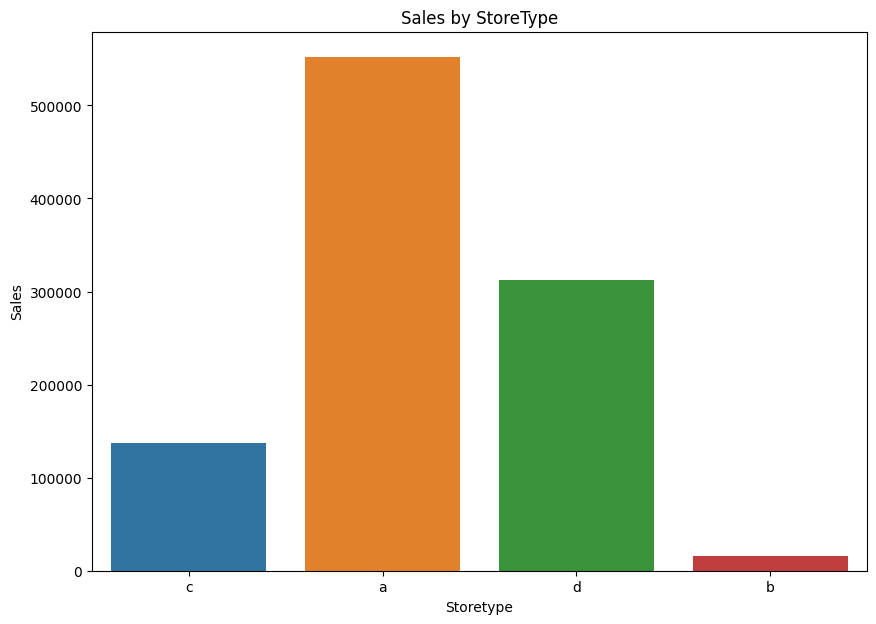

In [42]:
# Chart - 2 visualization code
fig=plt.figure(figsize=(10,7))
sns.countplot(x='StoreType',data=df)
plt.xlabel('Storetype')
plt.ylabel('Sales')
plt.title('Sales by StoreType')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3
#Q3-How does the sales and customers vary when it is a stateholiday or schoolholiday?

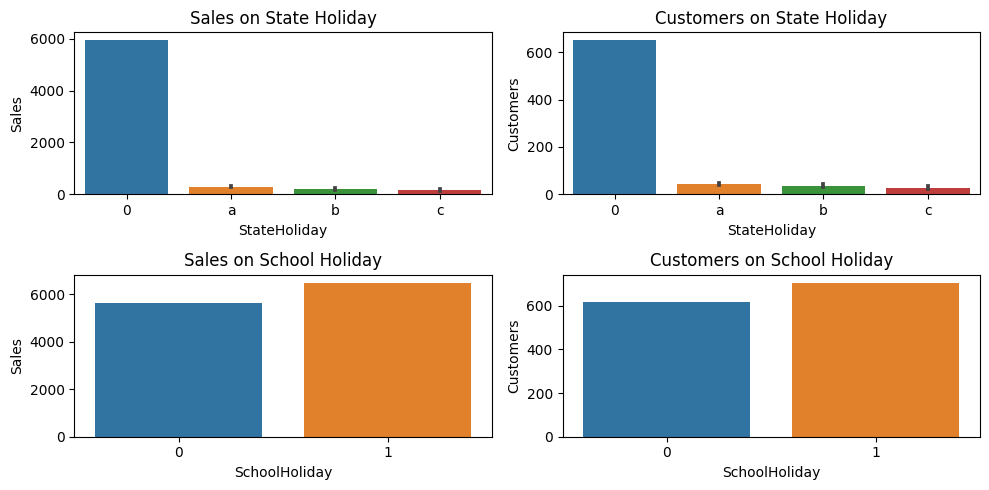

In [43]:
# Chart - 3 visualization code
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
sns.barplot(x='StateHoliday', y='Sales', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Sales on State Holiday')
sns.barplot(x='StateHoliday', y='Customers', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Customers on State Holiday')
sns.barplot(x='SchoolHoliday', y='Sales', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Sales on School Holiday')
sns.barplot(x='SchoolHoliday', y='Customers', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Customers on School Holiday')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4
#Q4-How does the Sales and Customers vary due to Promo?

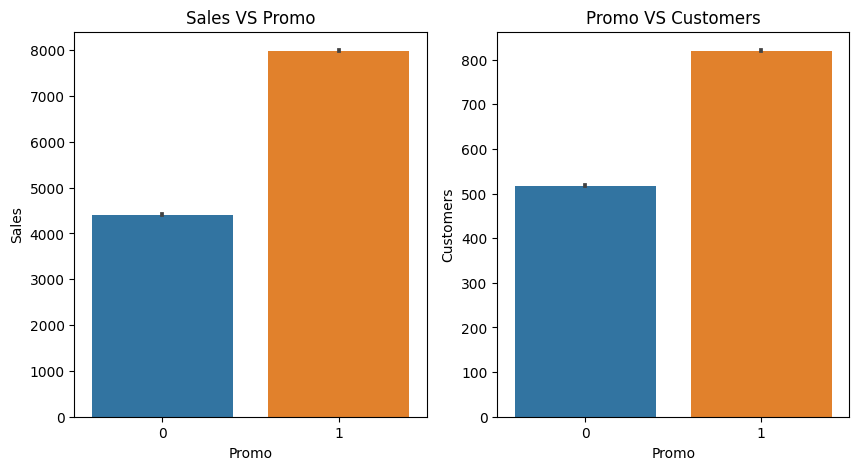

In [44]:
# Chart - 4 visualization code
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='Promo',y='Sales',data=df,ax=axis1)
axis1.title.set_text('Sales VS Promo')
sns.barplot(x='Promo',y='Customers',data=df,ax=axis2)
axis2.title.set_text('Promo VS Customers')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5
#Q5-How does the Sales vary across different storetypes and assortments?

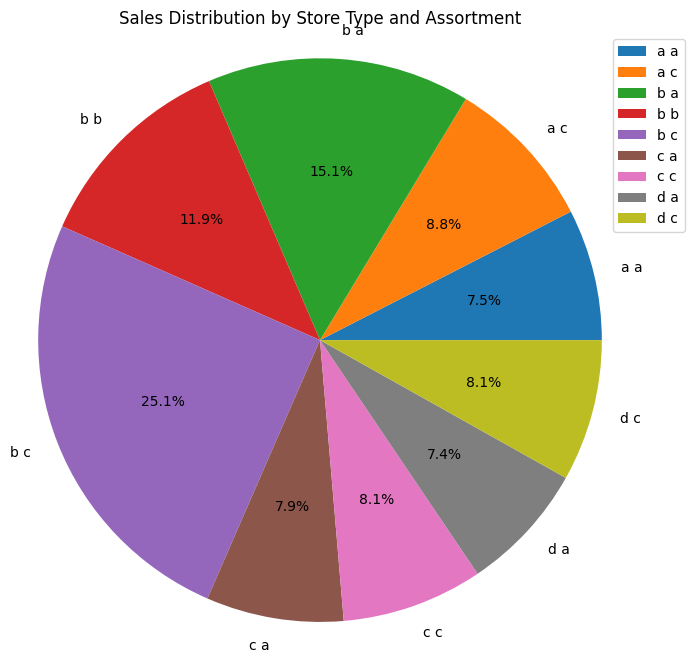

In [45]:
# Chart - 5 visualization code
var = df.groupby(['StoreType', 'Assortment'])['Sales'].mean().reset_index()
plt.figure(figsize=(8, 8))
plt.pie(var['Sales'], labels=var['StoreType'] + ' ' + var['Assortment'], autopct='%1.1f%%')
plt.title('Sales Distribution by Store Type and Assortment')
plt.axis('equal')
plt.legend(loc='upper right',bbox_to_anchor=(1.1,1))
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6
#How does the Sales vary by CompetitionDistance?

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

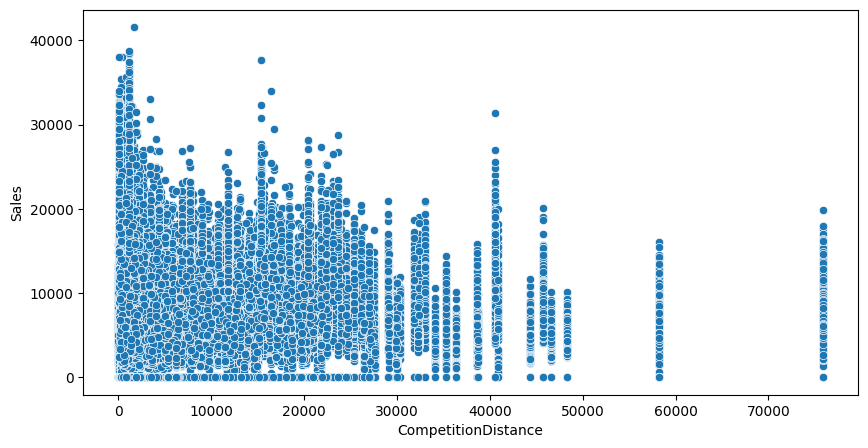

In [46]:
# Chart - 6 visualization code
fig=plt.figure(figsize=(10,5))
sns.scatterplot(x='CompetitionDistance',y='Sales',data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7
#What is the relation between store oppenness and Sales?

<Axes: xlabel='Open', ylabel='Sales'>

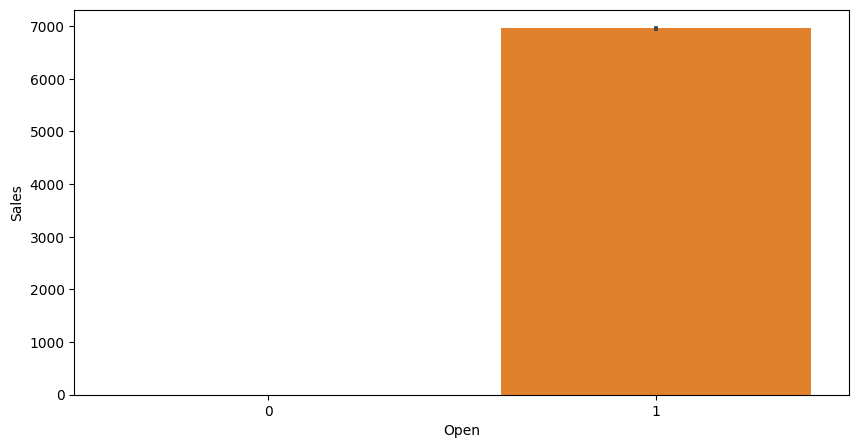

In [47]:
# Chart - 7 visualization code
fig=plt.figure(figsize=(10,5))
sns.barplot(x='Open',y='Sales',data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8
#Checking the Distribution of the dependent variable i.e. Sales.

<ipython-input-48-868c92084b27>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

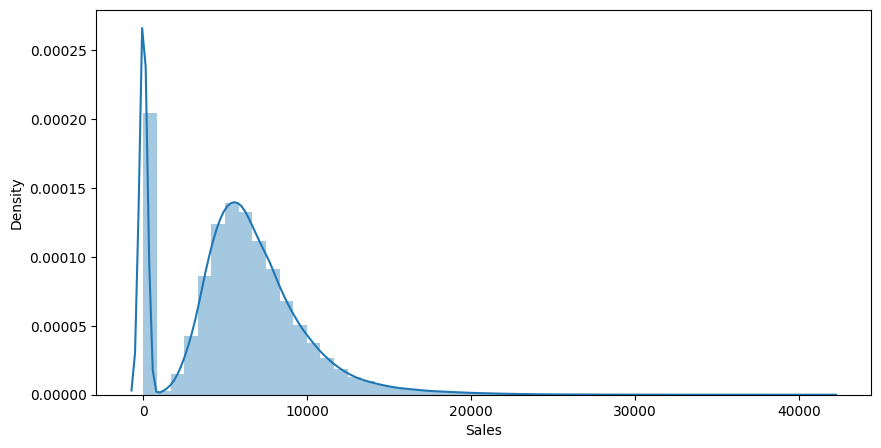

In [48]:
# Chart - 8 visualization code
fig=plt.figure(figsize=(10,5))
sns.distplot(df['Sales'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9
#Checking the relation between numerical variables and dependent variable.

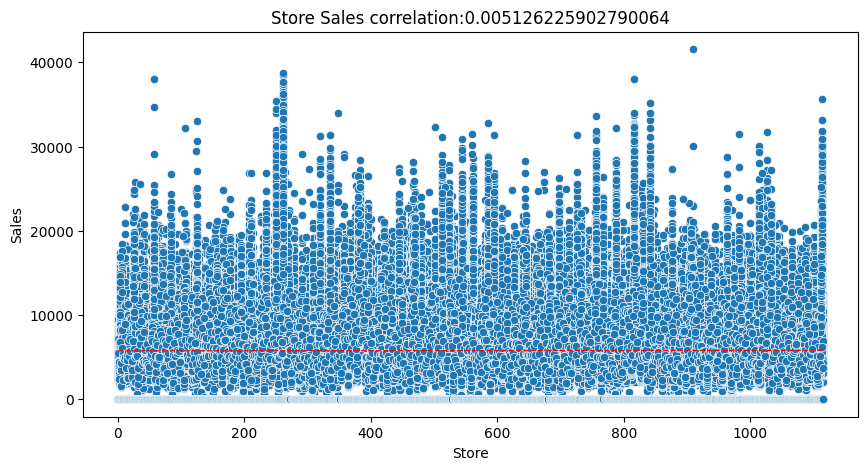

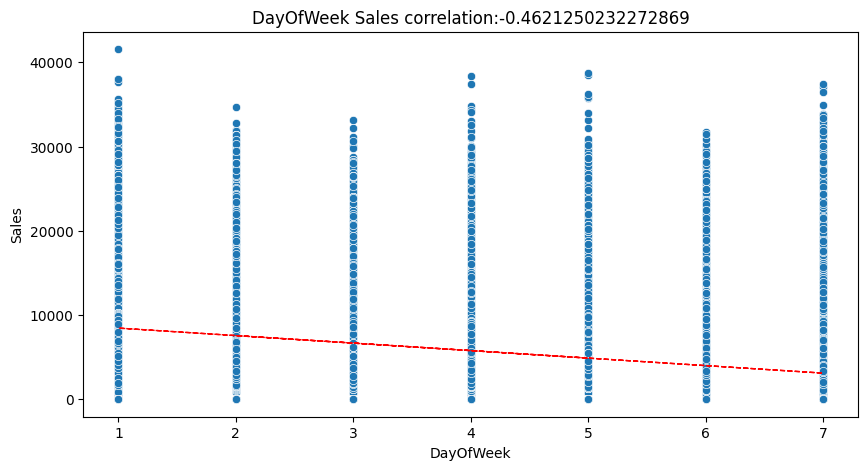

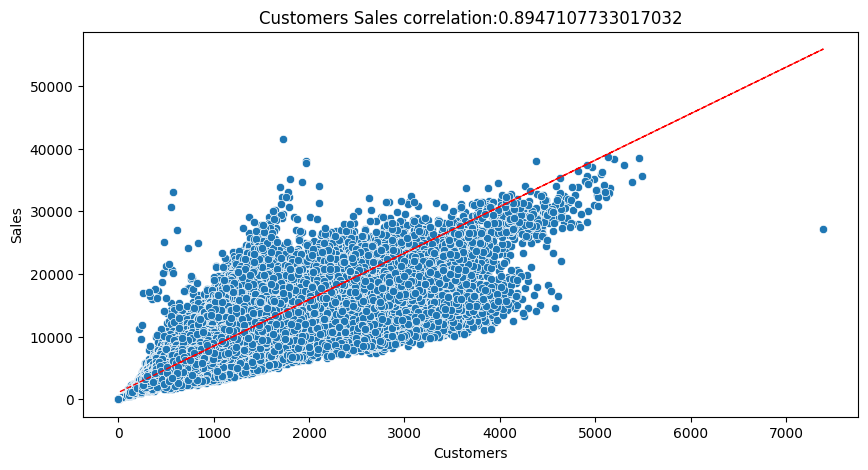

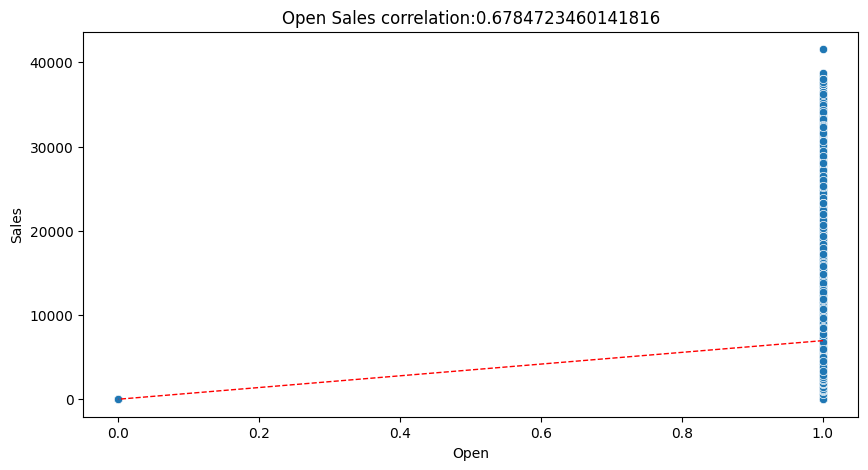

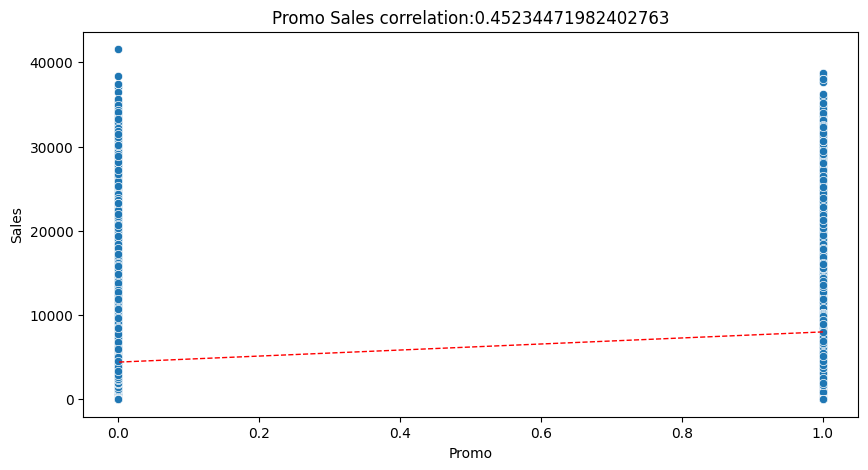

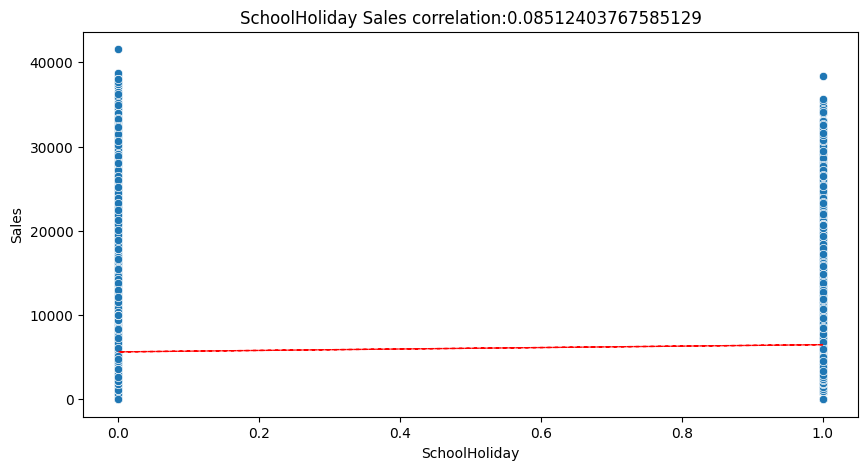

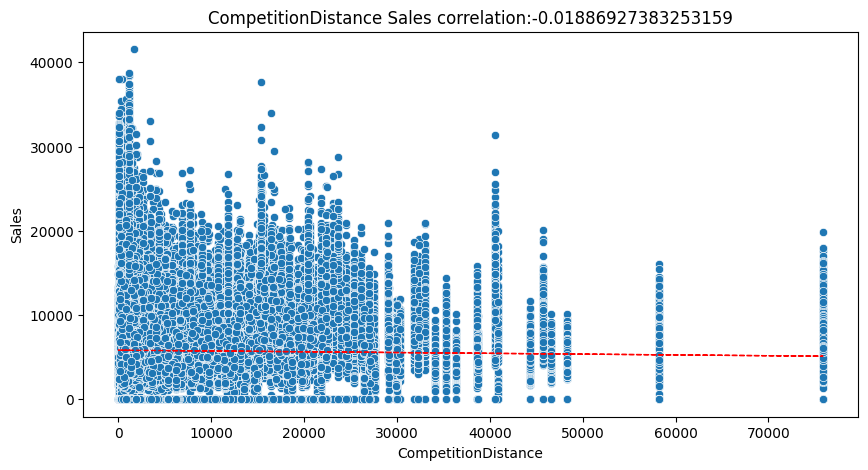

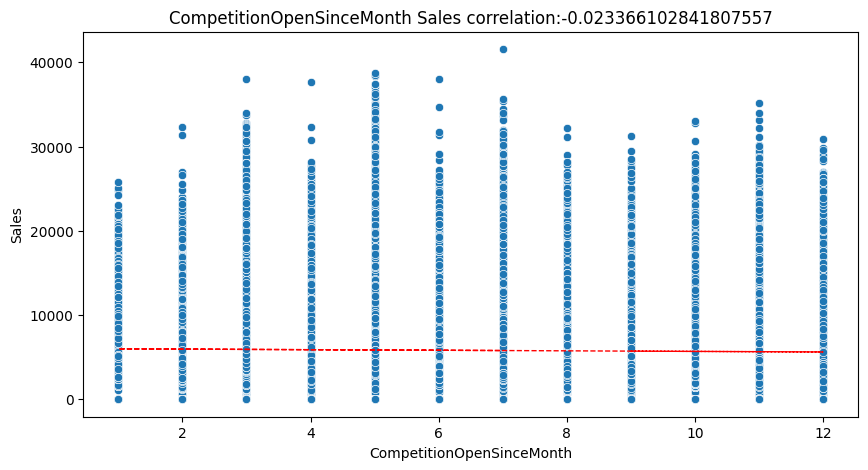

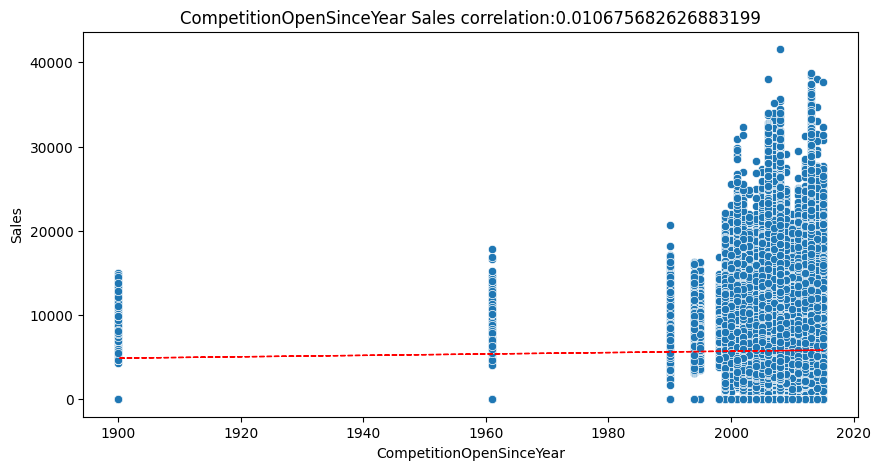

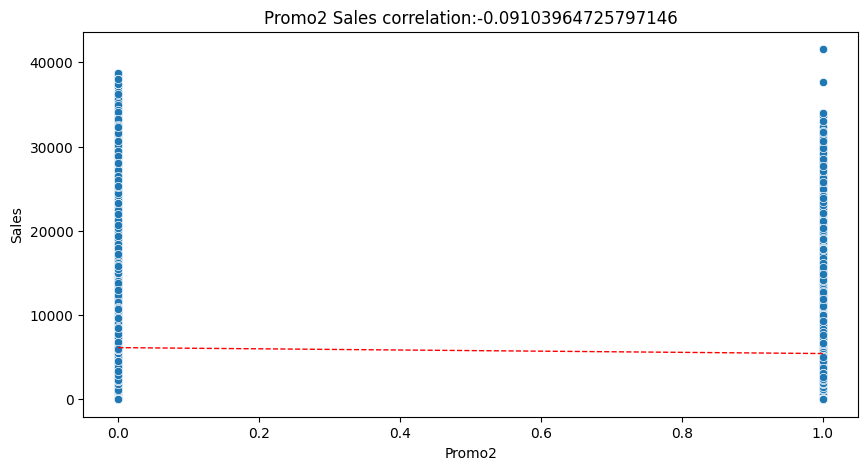

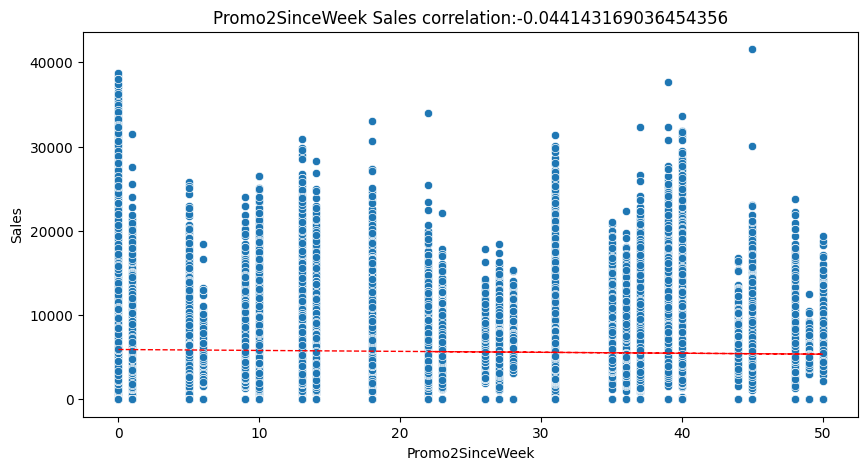

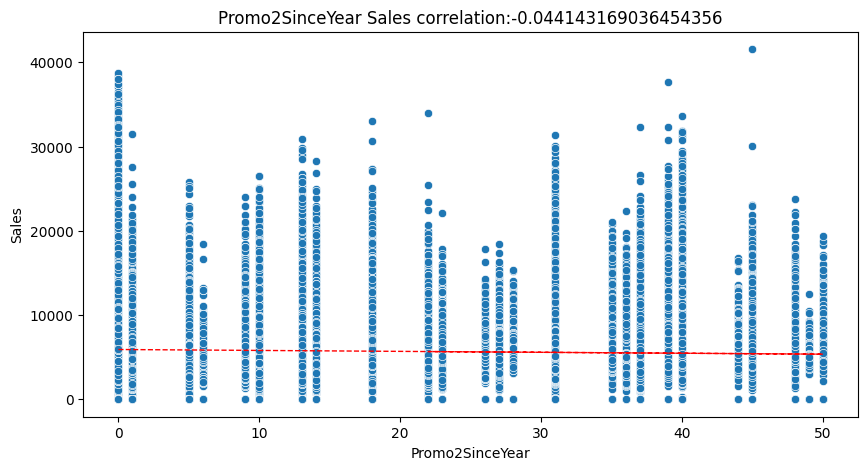

In [49]:
# Chart - 9 visualization code
for col in num_var:
  fig=plt.figure(figsize=(10,5))
  ax=fig.gca()
  feature=df[col]
  label=df['Sales']
  correlation=feature.corr(label)
  sns.scatterplot(x=feature,y=label)
  z=np.polyfit(df[col],df['Sales'],1)
  y_hat=np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, "r--", lw=1)
  plt.xlabel(col)
  plt.ylabel('Sales')
  ax.set_title(col+' '+'Sales'+' correlation:'+str(correlation))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10
#Analysis of categorical variable.

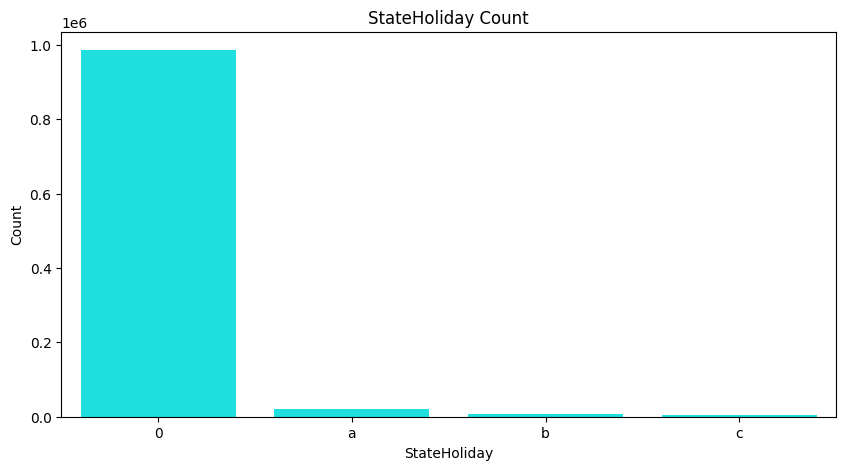

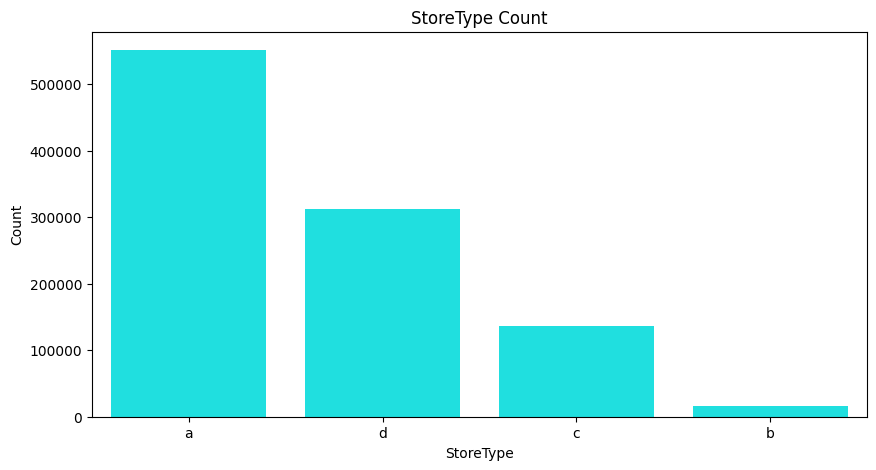

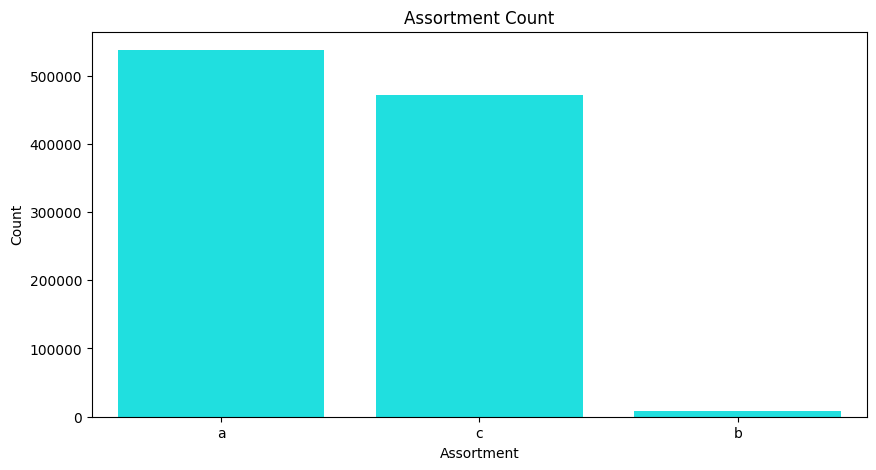

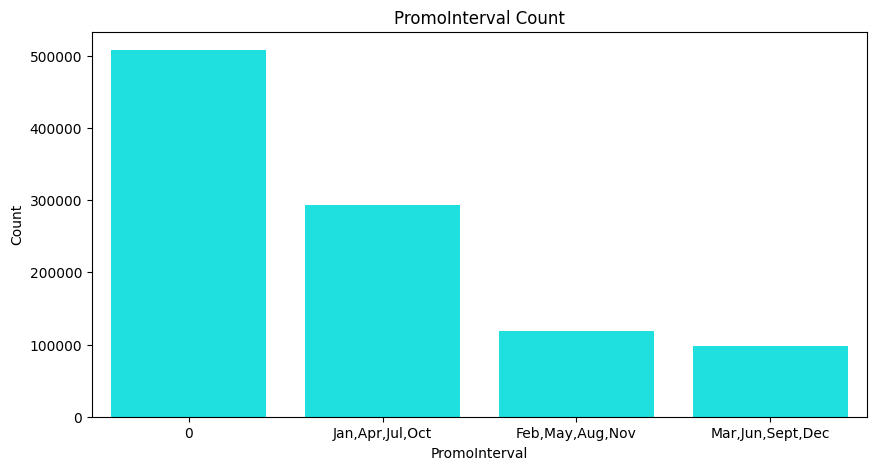

In [50]:
# Chart - 10 visualization code
for col in cat_var:
  fig=plt.figure(figsize=(10,5))
  counts=df[col].value_counts()
  ax=fig.gca()
  feature=df[col]
  sns.barplot(x=counts.index, y=counts.values, ax=ax, color='cyan')
  plt.xlabel(col)
  plt.ylabel('Count')
  ax.set_title(col + ' Count')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11
#Total Sales done by each Store.

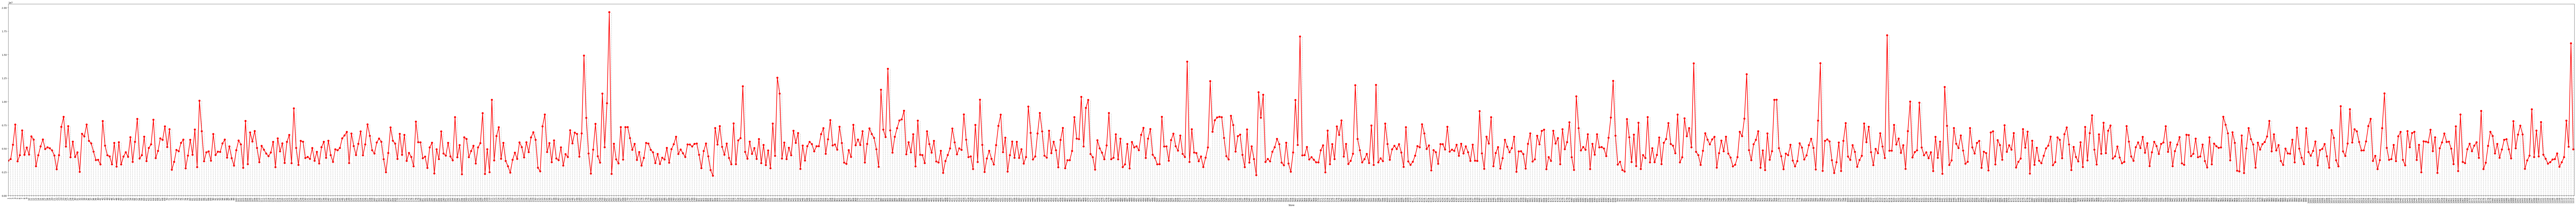

In [51]:
# Chart - 11 visualization code
fig=plt.figure(figsize=(200,15))
c=df.groupby('Store')['Sales'].sum()
ax=sns.pointplot(x=c.index,y=c.values,color='r')
plt.xticks(rotation=90);
ax.set_ylim(bottom=0)
ax.set_xlim(0)
ax.vlines(c.index,1, c.values, linestyles='dashed', colors='gray', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12


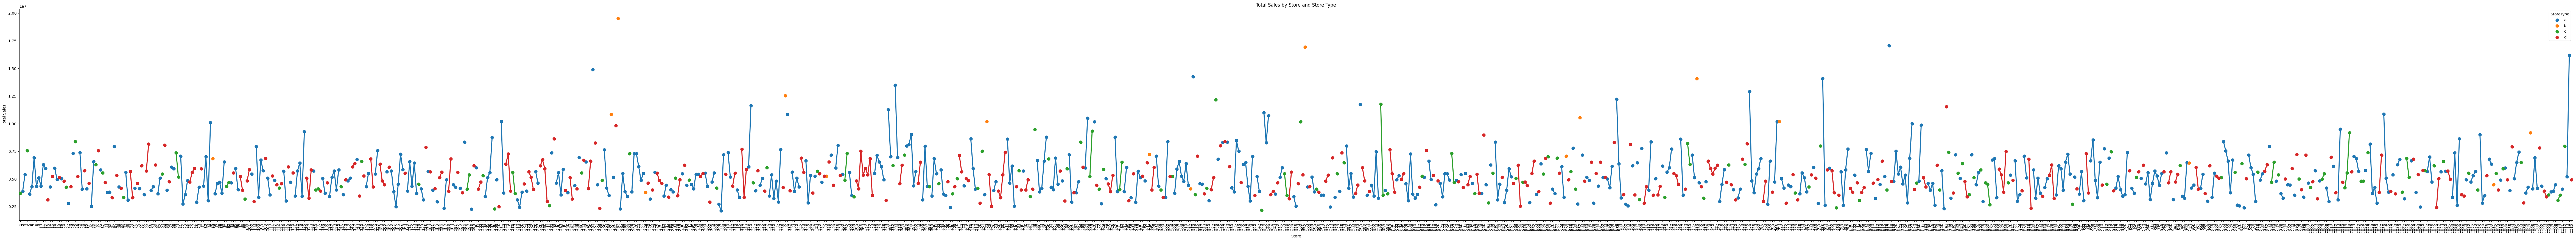

In [52]:
s=df.groupby(['StoreType','Store'])['Sales'].sum().reset_index()
plt.figure(figsize=(120, 10))
sns.pointplot(x='Store', y='Sales', hue='StoreType', data=s)
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Total Sales by Store and Store Type')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [53]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

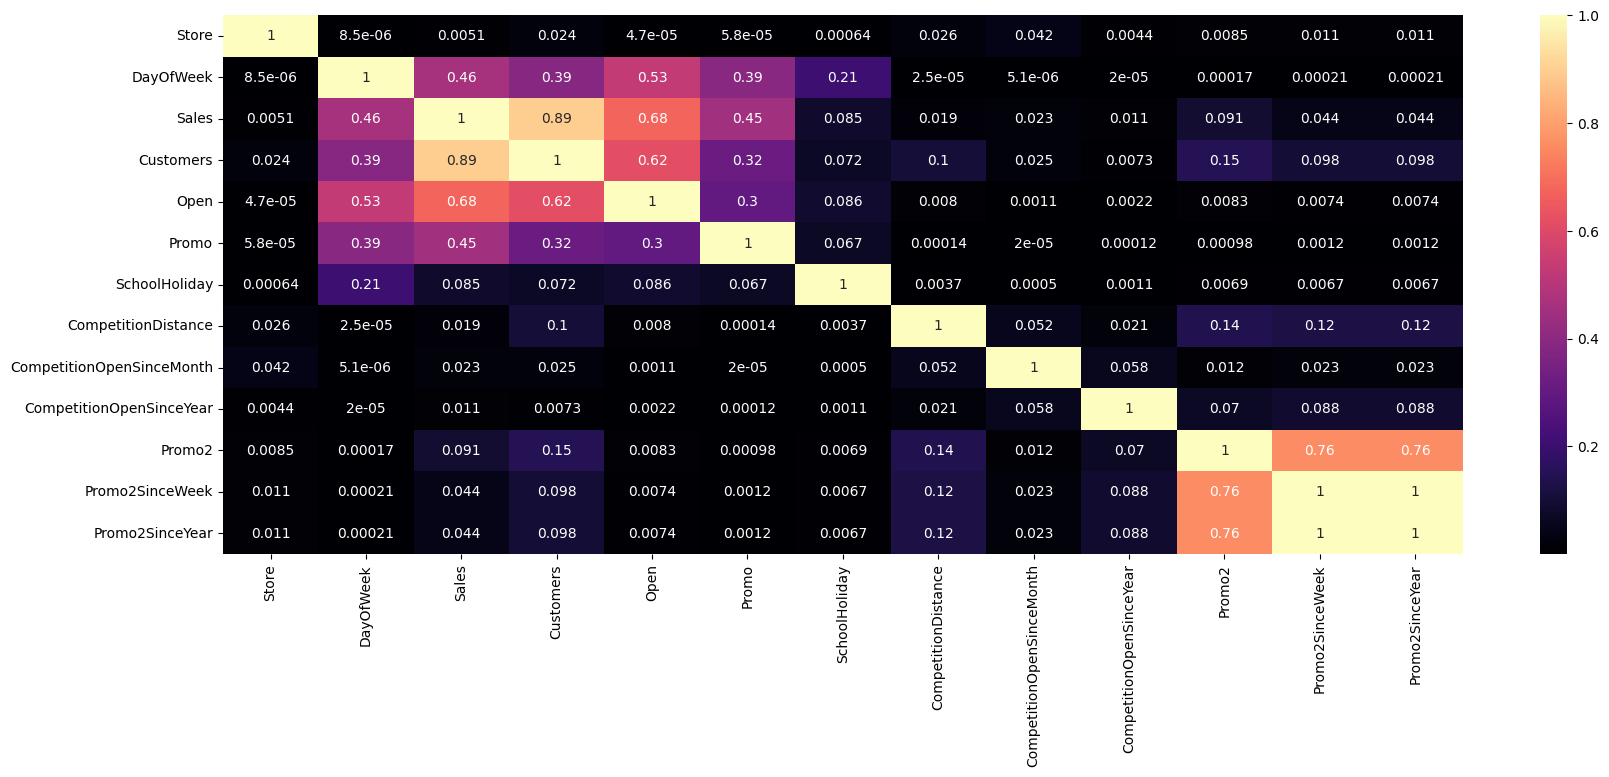

In [54]:
# Correlation Heatmap visualization code
fig=plt.figure(figsize=(20,7))
correlation=df.corr(numeric_only=True)
sns.heatmap(abs(correlation),annot=True,cmap='magma')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

In [55]:
# Checking Multicollinearty
def cal_vif(X):
  vif=pd.DataFrame()
  vif['Variables']=X.columns
  vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return(vif)


In [56]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Sales','Promo2SinceYear','Promo2SinceWeek']]])

Variables        vif
0                      Store   4.022731
1                  DayOfWeek   7.880632
2                  Customers   5.107847
3                       Open  11.531640
4                      Promo   1.990667
5              SchoolHoliday   1.272379
6        CompetitionDistance   1.576038
7  CompetitionOpenSinceMonth   8.308391
8   CompetitionOpenSinceYear  35.624287
9                     Promo2   2.138322

In [57]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Sales','Promo2SinceYear','Promo2SinceWeek','Open','CompetitionOpenSinceYear']]])

Variables       vif
0                      Store  3.542842
1                  DayOfWeek  4.163586
2                  Customers  2.880572
3                      Promo  1.885194
4              SchoolHoliday  1.229585
5        CompetitionDistance  1.452126
6  CompetitionOpenSinceMonth  5.731899
7                     Promo2  1.920369

In [58]:
numerical_features=['Store','DayOfWeek','Customers','Promo','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceMonth','Promo2']

#### Chart - 15 - Pair Plot 

<Figure size 1500x700 with 0 Axes>

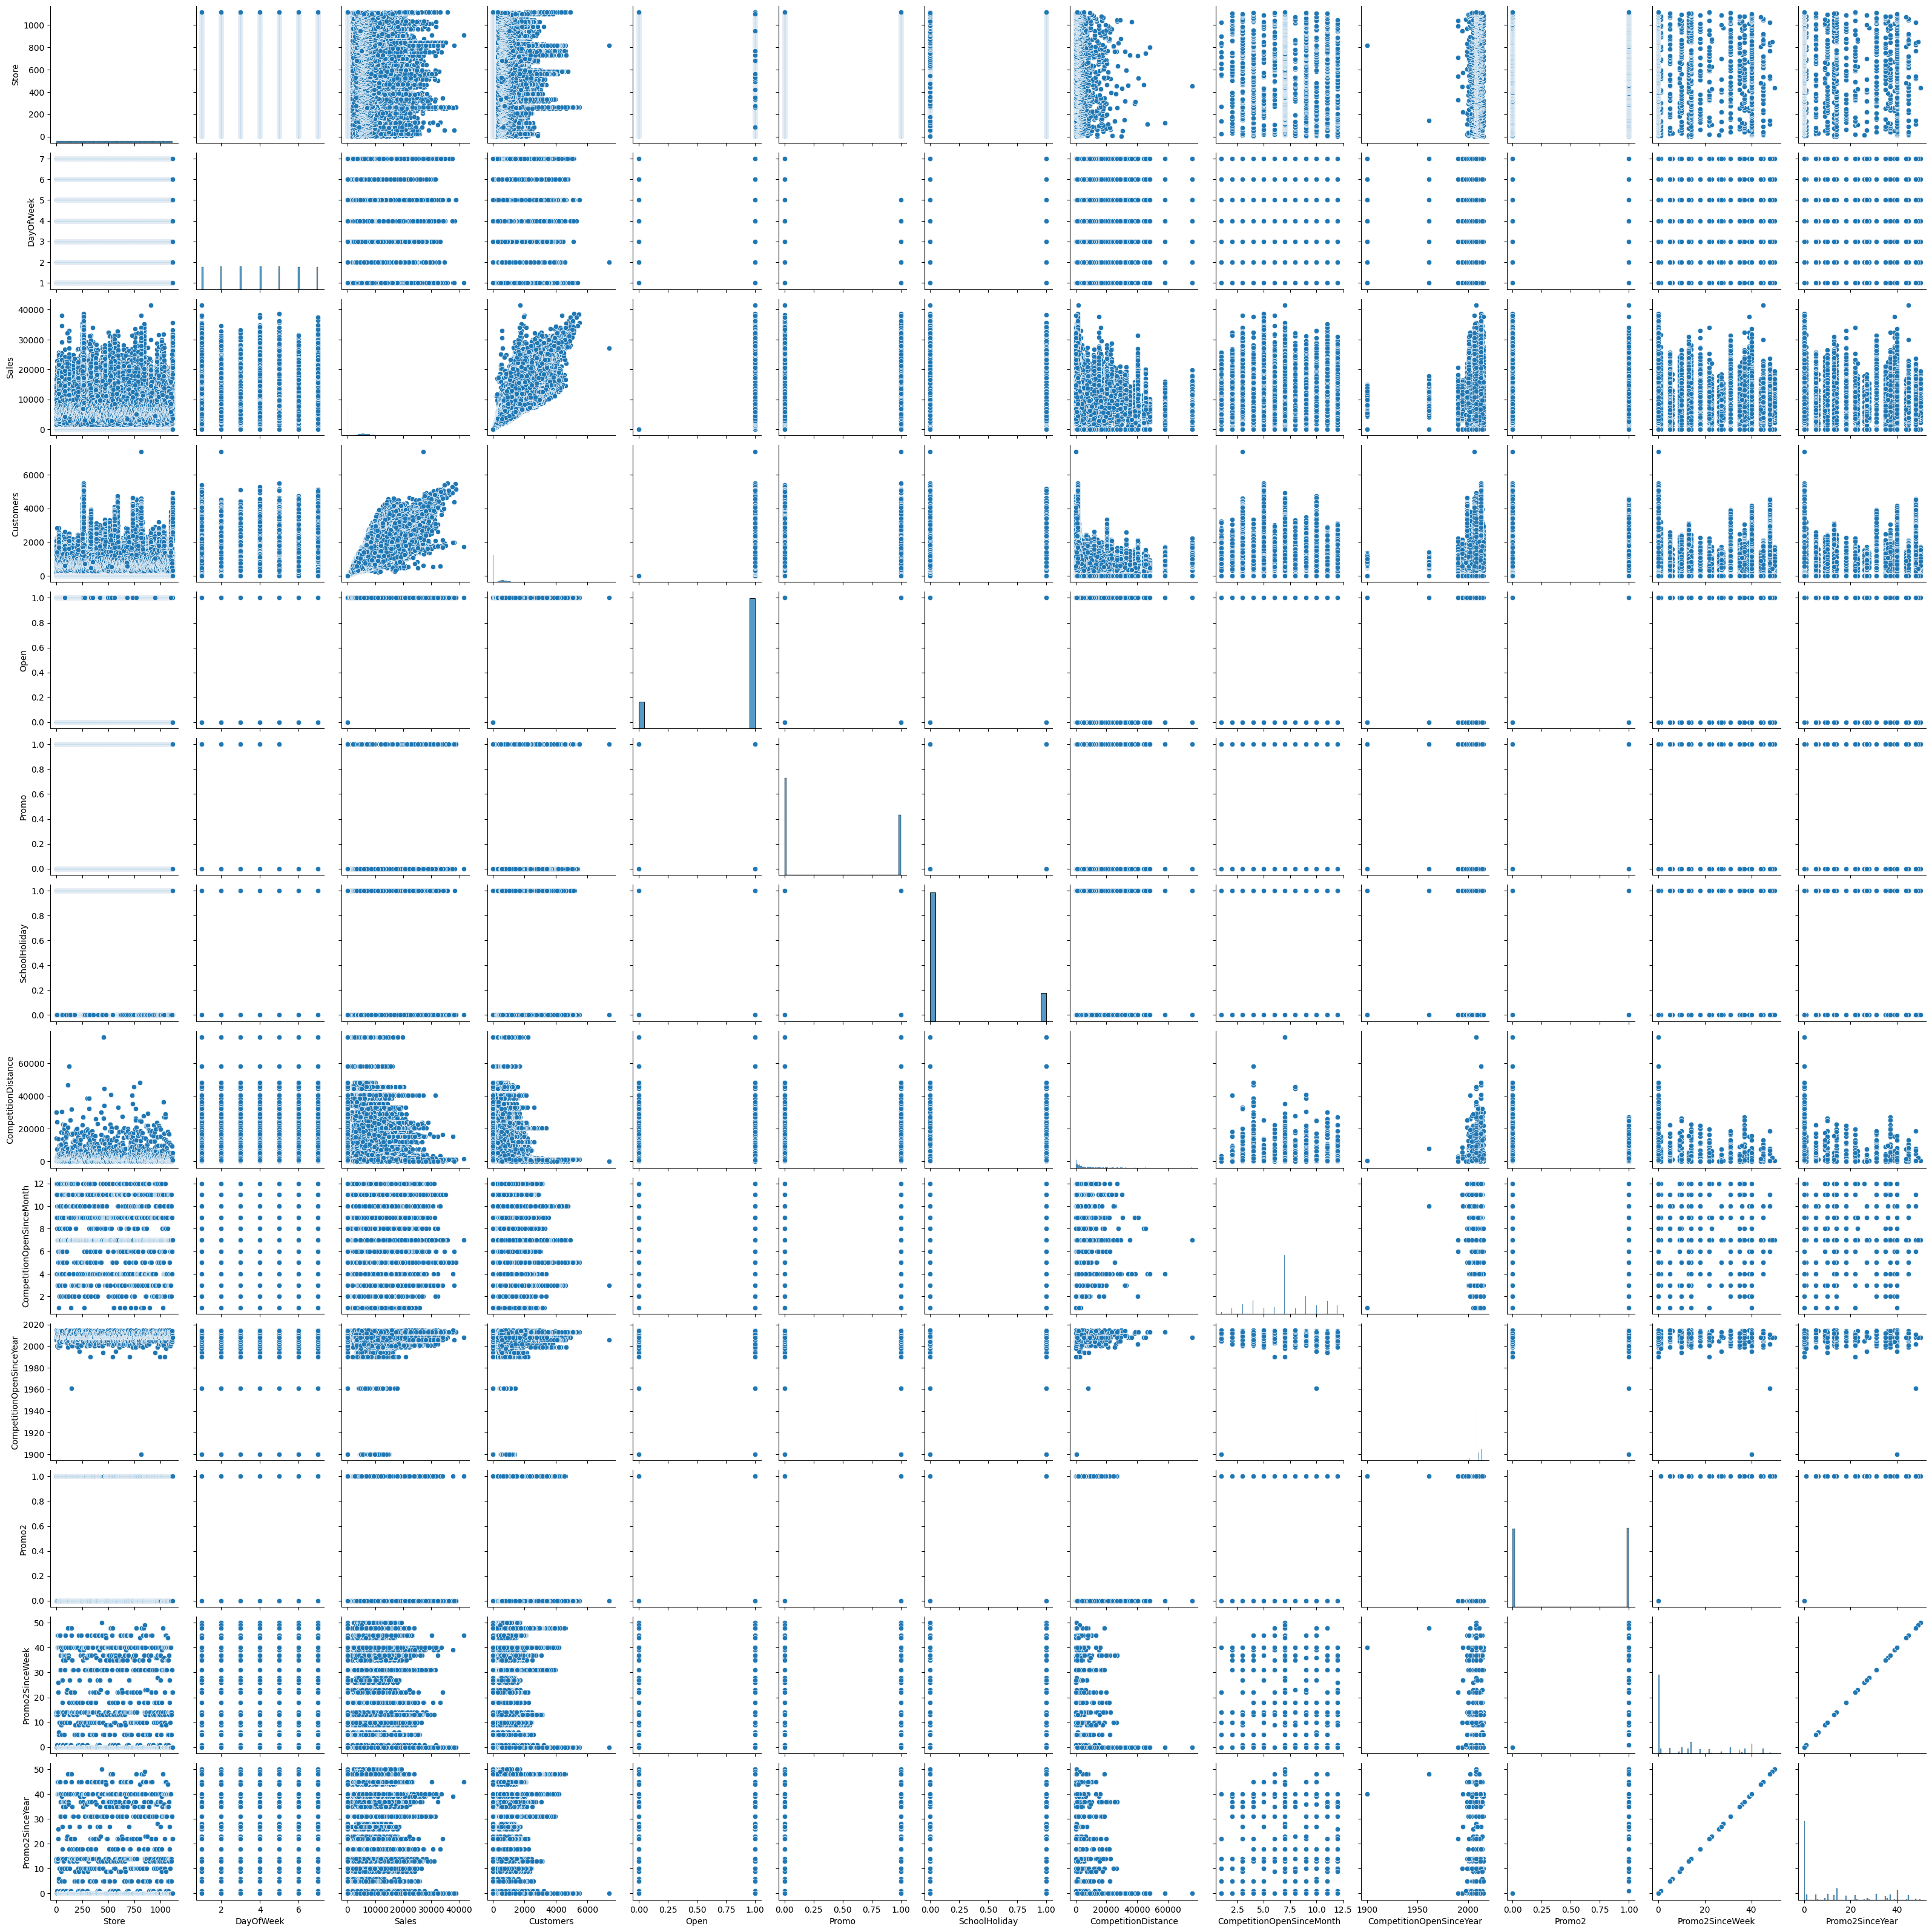

In [59]:
# Pair Plot visualization code
fig=plt.figure(figsize=(15,7))
sns.pairplot(df)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1
#The average sales of stores with a "Promo" are higher than the average sales of stores without a "Promo".

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average sales of stores with a "Promo" are the same as the average sales of stores without a "Promo."

Alternative Hypothesis (H1): The average sales of stores with a "Promo" are higher than the average sales of stores without a "Promo."

#### 2. Perform an appropriate statistical test.

In [60]:
# Perform Statistical Test to obtain P-Value
sales_with_promo = df[df['Promo'] == 1]['Sales']
sales_without_promo = df[df['Promo'] == 0]['Sales']

t_stat, p_value = stats.ttest_ind(sales_with_promo, sales_without_promo, alternative='greater')
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. The average sales of stores with a 'Promo' are higher than the average sales without a 'Promo'."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in the average sales with and without a 'Promo'."
print(conclusion)

Reject the null hypothesis. The average sales of stores with a 'Promo' are higher than the average sales without a 'Promo'.


##### Which statistical test have you done to obtain P-Value?

Two-sampled t-test.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#There is a significant difference in the average sales of stores across different store types.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0):There is no significant difference in the average sales of stores across different store types.

Alternate Hypothesis(H1):There is a significant difference in the average sales of stores across different store types.

#### 2. Perform an appropriate statistical test.

In [62]:
# Perform Statistical Test to obtain P-Value
store_type_a = df[df['StoreType'] == 'a']['Sales']
store_type_b = df[df['StoreType'] == 'b']['Sales']
store_type_c = df[df['StoreType'] == 'c']['Sales']
store_type_d = df[df['StoreType'] == 'd']['Sales']

f_stat, p_value = stats.f_oneway(store_type_a, store_type_b, store_type_c, store_type_d)
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in the average sales across different store types."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in the average sales across different store types."
print(conclusion)



Reject the null hypothesis. There is a significant difference in the average sales across different store types.


##### Which statistical test have you done to obtain P-Value?

ANOVA test.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#The average sales of stores during school holidays are higher than the average sales during non-school holidays.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis(H0):The average sales of stores during school holidays are the same as the average sales during non-school holidays.

Alternate Hypothesis(H1):The average sales of stores during school holidays are higher than the average sales during non-school holidays.

#### 2. Perform an appropriate statistical test.

In [63]:
# Perform Statistical Test to obtain P-Value
sales_school_holidays = df[df['SchoolHoliday'] == 1]['Sales']
sales_non_school_holidays = df[df['SchoolHoliday'] == 0]['Sales']
t_stat, p_value = stats.ttest_ind(sales_school_holidays, sales_non_school_holidays, alternative='greater')
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. The average sales during school holidays are higher than the average sales during non-school holidays."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference in the average sales during school holidays and non-school holidays."
print(conclusion)


Reject the null hypothesis. The average sales during school holidays are higher than the average sales during non-school holidays.


##### Which statistical test have you done to obtain P-Value?

Two sampled t-test

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

#### What all missing value imputation techniques have you used and why did you use those techniques?

Mean/Mode/Median imputation is used to fill the missing values.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.